# <b>Simple SVM Example</b>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

In [4]:
# create a simple dataset
x_blue = np.array([0.3, 0.5, 1, 1.4, 1.7, 2])
y_blue = np.array([1, 4.5, 2.3, 1.9, 8.9, 4.1])

x_red = np.array([3.3, 3.5, 4, 4.4, 5.7, 6])
y_red = np.array([7, 1.5, 6.3, 1.9, 2.9, 7.1])

X = np.array([[0.3,1],[0.5,4.5],[1,2.3],[1.4,1.9],[1.7,8.9],[2,4.1],[3.3,7],[3.5,1.5],[4,6.3],[4.4,1.9],[5.7,2.9],[6,7.1]])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]) # 0: blue class, 1: red class

C:\Users\pc\AppData\Local\Temp\ipykernel_2156\32429519.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_blue, y_blue, 'ro', color='blue')
C:\Users\pc\AppData\Local\Temp\ipykernel_2156\32429519.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_red, y_red, 'ro', color='red')
C:\Users\pc\AppData\Local\Temp\ipykernel_2156\32429519.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(2.5,4.5,'ro',color='green')


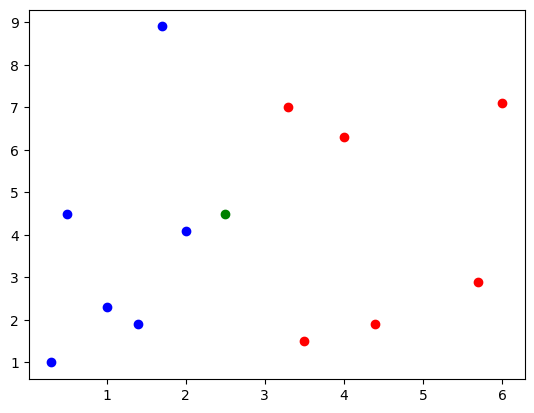

In [8]:
# plot the dataset
plt.plot(x_blue, y_blue, 'ro', color='blue')
plt.plot(x_red, y_red, 'ro', color='red')
plt.plot(2.5,4.5,'ro',color='green')

In [9]:
# create the SVM model and start training
# C parameter -> trades off hyperplane surface simplicity + training examples missclassifications
#					Low value: simple/smooth hyperplane surface 
#					High value: all training examples classified correctly but complex surface 
model = svm.SVC()
model = model.fit(X, y)

In [10]:
print(model.predict([[2.5, 4.5]]))
# this means green dot classified as blue.

[0]


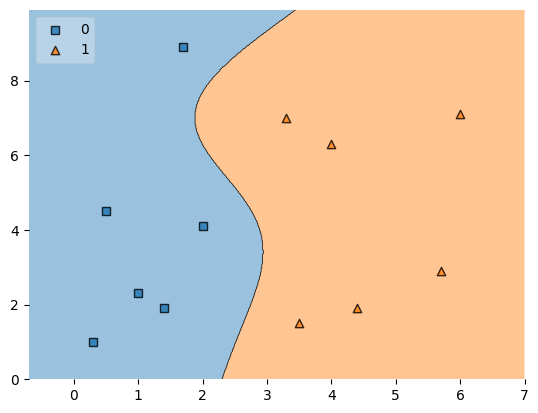

In [13]:
plot_decision_regions(X, y, clf=model, legend=2);

## Testing C Parameter

In [15]:
# shuffle the dataset
x_blue = np.array([0.5, 1, 1.4, 1.7, 2])
y_blue = np.array([4.5, 2.3, 1.9, 8.9, 4.1])

x_red = np.array([0.3, 3.3, 3.5, 4, 4.4, 5.7, 6])
y_red = np.array([1, 7, 1.5, 6.3, 1.9, 2.9, 7.1])

X = np.array([[0.3,1],[0.5,4.5],[1,2.3],[1.4,1.9],[1.7,8.9],[2,4.1],[3.3,7],[3.5,1.5],[4,6.3],[4.4,1.9],[5.7,2.9],[6,7.1]])
y = np.array([1,0,0,0,0,0,1,1,1,1,1,1]) # 0: blue class, 1: red class

C:\Users\pc\AppData\Local\Temp\ipykernel_2156\3196135804.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_blue, y_blue, 'ro', color='blue')
C:\Users\pc\AppData\Local\Temp\ipykernel_2156\3196135804.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_red, y_red, 'ro', color='red')
C:\Users\pc\AppData\Local\Temp\ipykernel_2156\3196135804.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(2.5,4.5,'ro',color='green')


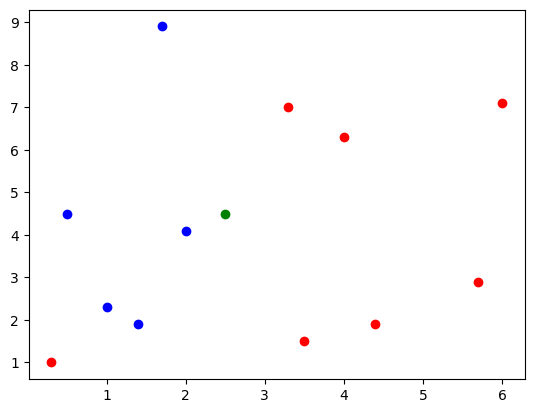

In [16]:
# plot the dataset
plt.plot(x_blue, y_blue, 'ro', color='blue')
plt.plot(x_red, y_red, 'ro', color='red')
plt.plot(2.5,4.5,'ro',color='green')

In [17]:
model = svm.SVC(C=1)
model = model.fit(X, y)

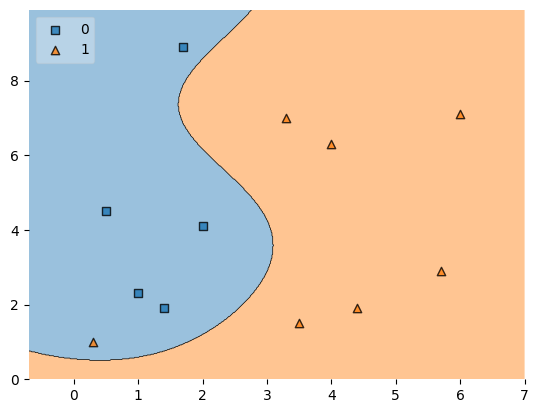

In [18]:
plot_decision_regions(X, y, clf=model, legend=2);

It made a mistake. Underfitting.

In [19]:
model = svm.SVC(C=10)
model = model.fit(X, y)

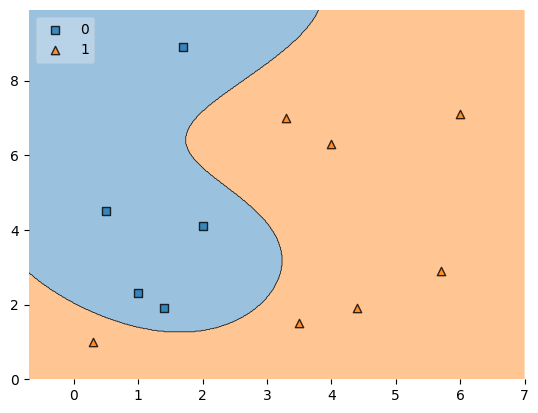

In [20]:
plot_decision_regions(X, y, clf=model, legend=2);

It didn't make any mistake. May be overfitted or not.

# <b>SVM on Iris Dataset</b>

In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets

In [22]:
# load dataset
iris_data = datasets.load_iris()

In [26]:
# select dependent and independent variables
features = iris_data.data
target = iris_data.target

In [27]:
# split the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [29]:
# create the SVM model and start training
model = svm.SVC()
model = model.fit(X_train, y_train)

In [30]:
# get predictions on test dataset of features
predictions = model.predict(X_test)

In [33]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))

Confusion Matrix: 
 [[14  0  0]
 [ 0 11  0]
 [ 0  1 19]]
Accuracy:  0.9777777777777777


## Parameter Tuning with Grid Search

In [34]:
iris_data = datasets.load_iris()

# select dependent and independent variables
features = iris_data.data
target = iris_data.target

# split the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

# create the SVM model
model = svm.SVC()

In [36]:
# define the parameter grid
param_grid = {"C": [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 200],
              "gamma": [1, 0.1, 0.01, 0.001],
              "kernel": ["rbf", "poly", "sigmoid"]}

In [37]:
# import grid search
from sklearn.model_selection import GridSearchCV

In [38]:
grid = GridSearchCV(model, param_grid, refit=True)

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 200],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [42]:
grid.best_estimator_

SVC(C=50, gamma=0.01)

In [43]:
grid_predictions = grid.predict(X_test)

In [44]:
print("Confusion Matrix: \n", confusion_matrix(y_test, grid_predictions))
print("Accuracy: ", accuracy_score(y_test, grid_predictions))

Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy:  1.0


# <b>SVM on Digit Dataset</b>

In [60]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
# load the dataset
digits_data = datasets.load_digits()

In [47]:
images_and_labels = list(zip(digits_data.images, digits_data.target))

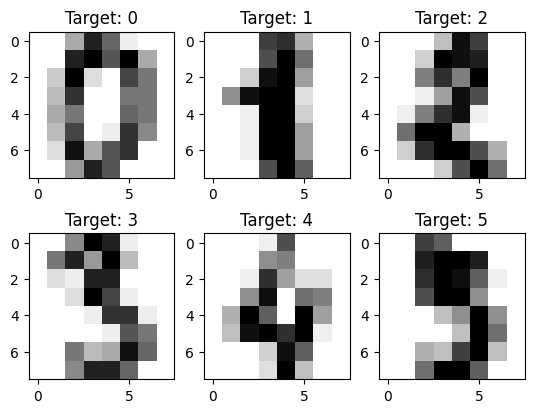

In [48]:
for index, (image, label) in enumerate(images_and_labels[:6]):
   plt.subplot(2, 3, index + 1)
   plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
   plt.title('Target: %i' % label)

In [51]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits_data.images)
data = digits_data.images.reshape((n_samples, -1))

In [52]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [55]:
train_test_split_index = int(len(digits_data.images)*0.75)

In [56]:
# create the SVM model and train
model = svm.SVC(gamma=0.001)
model = model.fit(data[:train_test_split_index], digits_data.target[:train_test_split_index])

In [57]:
# define expected (y_test) and predicted values
expected = digits_data.target[train_test_split_index:]
predicted = model.predict(data[train_test_split_index:])

In [58]:
print(confusion_matrix(expected, predicted))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  2  0  1  4  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  0  0 43]]


In [61]:
print(accuracy_score(expected, predicted))

0.9666666666666667


Prediction for test image:  [9]


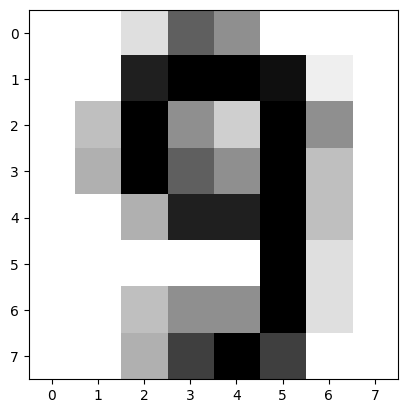

In [63]:
# manuel test
plt.imshow(digits_data.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
print("Prediction for test image: ", model.predict(data[-2].reshape(1,-1)))